<a href="https://colab.research.google.com/github/rochinha23/Curso-Data-Science-e-Machine-Learning-com-Estatistica-e-Python/blob/main/Estatistica_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regressão linear** equação que estima um y atraves do x

**Importar pandas e matplotlib**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Criar um Data Frame de faturamento mensal de 12 meses**

In [2]:
faturamento = [25,38,29,115,82,114,120,160,153,190,239,175]

In [3]:
mes = list(range(1,13))

In [4]:
data_dict = {'mes': mes, 'faturamento': faturamento}

In [5]:
data_dict

{'faturamento': [25, 38, 29, 115, 82, 114, 120, 160, 153, 190, 239, 175],
 'mes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

In [6]:
data = pd.DataFrame.from_dict(data_dict)

In [7]:
data

,mes,faturamento
0,1,25
1,2,38
2,3,29
3,4,115
4,5,82
5,6,114
6,7,120
7,8,160
8,9,153
9,10,190


**Visualizar dados em Gráfico de dispersão**

In [8]:
x = data['mes']
y = data['faturamento']


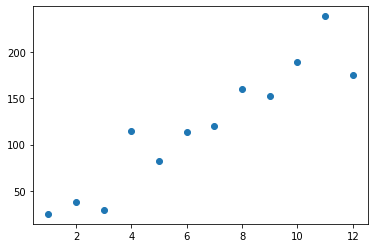

In [9]:
plt.scatter(x,y)
plt.show()

In [10]:
data[['mes','faturamento']].corr()

,mes,faturamento
mes,1.000000,0.935045
faturamento,0.935045,1.000000


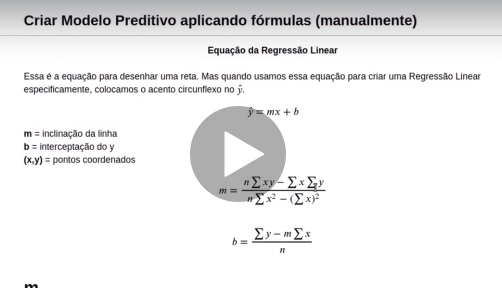

n = numero de observações


encontrando o valor de **m**

In [11]:
somatorioX = x.sum()

In [12]:
somatorioY = y.sum()

In [13]:
x*y

0       25
1       76
2       87
3      460
4      410
5      684
6      840
7     1280
8     1377
9     1900
10    2629
11    2100
dtype: int64

In [14]:
x**2

0       1
1       4
2       9
3      16
4      25
5      36
6      49
7      64
8      81
9     100
10    121
11    144
Name: mes, dtype: int64

In [15]:
somatorioXY = (x*y).sum()

In [16]:
somatorioXquadrado = (x**2).sum()

In [17]:
n = len(data['mes'])
n

12

In [18]:
m = ((n*somatorioXY) - (somatorioX*somatorioY))/ ((n*somatorioXquadrado) - ((somatorioX)**2) )

In [19]:
m.round(4)

17.5385

encontrando o valor de **b**

In [20]:
b = (somatorioY - (m*somatorioX))/n

In [21]:
b.round()

6.0

**Modelo Preditivo**

Criar modelo preditivo para prever (ou estimar) o rendimento de qualquer mês

y = mx + b

In [22]:
xpred = 24

In [23]:
ypred = m*xpred + b

In [24]:
ypred

426.92307692307696

**Predições para os 12 meses**

Criar uma lista contendo as predições para cada um dos 12 meses

In [25]:
xpred1a12 = 1
listapred1ao12 = []
for _ in range(1,13):
  ypred1ao12 = m*xpred1a12 + b
  listapred1ao12.append(ypred1ao12)
  xpred1a12+=1

In [26]:
listapred1ao12

[23.538461538461522,
 41.07692307692306,
 58.6153846153846,
 76.15384615384615,
 93.6923076923077,
 111.23076923076923,
 128.76923076923075,
 146.3076923076923,
 163.84615384615384,
 181.3846153846154,
 198.9230769230769,
 216.46153846153845]

**Predições para os meses 13 ao 24**

Criar uma lista contendo as predições para cada um dos 12 meses

In [27]:
xpred = 13
listapred13ao24 = []
for _ in range(13, 25):
  ypred = m*xpred + b
  listapred13ao24.append(ypred)
  xpred+=1

In [28]:
listapred13ao24

[234.0,
 251.53846153846152,
 269.0769230769231,
 286.61538461538464,
 304.1538461538462,
 321.69230769230774,
 339.2307692307693,
 356.76923076923083,
 374.3076923076923,
 391.84615384615387,
 409.3846153846154,
 426.92307692307696]

**Inserir predições no DataFrame**

In [29]:
data['predições'] = listapred1ao12

In [30]:
data

,mes,faturamento,predições
0,1,25,23.538462
1,2,38,41.076923
2,3,29,58.615385
3,4,115,76.153846
4,5,82,93.692308
5,6,114,111.230769
6,7,120,128.769231
7,8,160,146.307692
8,9,153,163.846154
9,10,190,181.384615


**Visualizar Regressão Linear**

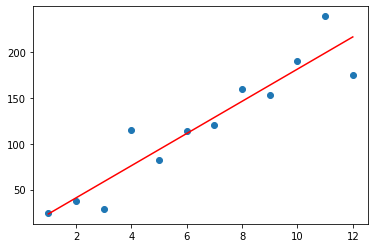

In [31]:
plt.scatter(x,y)
plt.plot(x,data['predições'],color='red')

**Coeficiente de determinação - R-quadrado (R^2)**

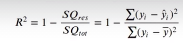

R-quadrado vai dar um valor % de qual bem o modelo se adequa as dados que estamos aplicando

**Calcular soma quadrática dos residuos(SQres)**

In [32]:
data['residuos'] = y - listapred1ao12

In [33]:
SQres = (data['residuos']**2).sum()
SQres

6323.538461538462

**Calcular soma quadrática total (SQtot)**

In [34]:
media = data['faturamento'].mean()
media

120.0

In [35]:
data['faturamento medio'] = media
data

,mes,faturamento,predições,residuos,faturamento medio
0,1,25,23.538462,1.461538,120.0
1,2,38,41.076923,-3.076923,120.0
2,3,29,58.615385,-29.615385,120.0
3,4,115,76.153846,38.846154,120.0
4,5,82,93.692308,-11.692308,120.0
5,6,114,111.230769,2.769231,120.0
6,7,120,128.769231,-8.769231,120.0
7,8,160,146.307692,13.692308,120.0
8,9,153,163.846154,-10.846154,120.0
9,10,190,181.384615,8.615385,120.0


In [36]:
SQtot = ((data['faturamento'] - data['faturamento medio'])**2).sum()
SQtot

50310.0

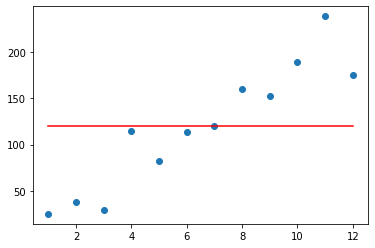

In [37]:
plt.scatter(x,y)
plt.plot(x,data['faturamento medio'],color='red')

**Calcular R-quadrado**

In [38]:
Rquadrado = 1-SQres/SQtot
Rquadrado.round(4)

0.8743

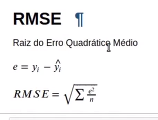

In [39]:
(data['residuos']**2).sum()

6323.538461538462

In [40]:
import numpy as np


In [41]:
rmse = np.sqrt(SQres/len(data))

In [42]:
rmse.round(4) #quanto menor este valor melhor é como se fosse o desvio padrão da regressão linear

22.9556

**Regra empirica 68-95-99.7**

In [43]:
um_acima = listapred1ao12 + rmse
um_abaixo = listapred1ao12 - rmse

In [44]:
dois_acima = listapred1ao12 + 2*rmse
dois_abaixo = listapred1ao12 - 2*rmse

In [45]:
tres_acima = listapred1ao12 + 3*rmse
tres_abaixo = listapred1ao12 - 3*rmse

**Um desvio padrão 68%**

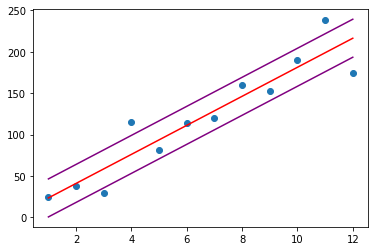

In [46]:
plt.scatter(x,y)
plt.plot(x,listapred1ao12,color='red')
plt.plot(x,um_acima,color='purple')
plt.plot(x,um_abaixo,color='purple')

**Dois desvios padrão 95%**

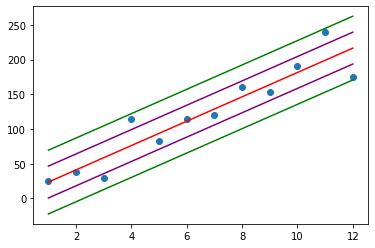

In [47]:
plt.scatter(x,y)
plt.plot(x,listapred1ao12,color='red')
plt.plot(x,um_acima,color='purple')
plt.plot(x,um_abaixo,color='purple')
plt.plot(x,dois_acima,color='green')
plt.plot(x,dois_abaixo,color='green')

**Três desvios padrão 99.7%**

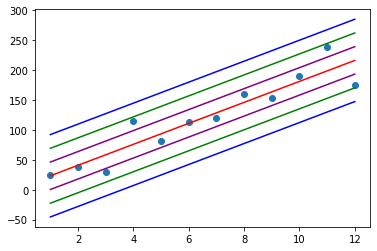

In [48]:
plt.scatter(x,y)
plt.plot(x,listapred1ao12,color='red')
plt.plot(x,um_acima,color='purple')
plt.plot(x,um_abaixo,color='purple')
plt.plot(x,dois_acima,color='green')
plt.plot(x,dois_abaixo,color='green')
plt.plot(x,tres_acima,color='blue')
plt.plot(x,tres_abaixo,color='blue')

**Regressão Linear - Statsmodels**

**Importando Statsmodels**

In [49]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Definir x e y**

In [50]:
x = data['mes']
y = data['faturamento']

In [52]:
y

0      25
1      38
2      29
3     115
4      82
5     114
6     120
7     160
8     153
9     190
10    239
11    175
Name: faturamento, dtype: int64

**Adicionar constante**

In [54]:
x = sm.add_constant(x.values)

In [55]:
x

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.]])

**Treinar Modelo**

In [56]:
modelo = sm.OLS(y,x).fit() #fit é para se adequar aos nossos dados

**Gerar predição**

In [57]:
sm_pred = modelo.predict()

In [60]:
np.array(listapred1ao12) #previsão feita manualmente 

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

In [58]:
sm_pred #previsão feita automaticamente

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

**Verificar parâmetros de perfomance do modelo preditivo**

In [61]:
modelo.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            faturamento   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     69.56
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           8.16e-06
Time:                        19:05:34   Log-Likelihood:                -54.630
No. Observations:                  12   AIC:                             113.3
Df Residuals:                      10   BIC:                             114.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0000     15.477      0.388      0.706     -28.484      40.484
x1            17.5385      2.103      8.340      0.000      12.853      22.224
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.757
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.142
Skew:                           0.175   Prob(JB):                        0.932
Kurtosis:                       2.599   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**RMSE**

In [62]:
from statsmodels.tools.eval_measures import rmse

In [64]:
rmse(y,sm_pred).round(4)

22.9556

**Regressão Linear - Sklearn**

**Importar sklearn**

In [65]:
from sklearn import linear_model

**Instanciar Modelo de regressão linear**

In [66]:
lm = linear_model.LinearRegression()

**Reshape x (remodelar x)**

Se x não possuir múltiplas variáveis, sklearn solicita que modifiquemos o formato

In [68]:
x = data['mes']
y = data['faturamento']

In [71]:
x = np.array(x).reshape(-1,1) #este é o formato que o sklearn precisa para funcionar

**Treinar Modelo**

In [72]:
sk_modelo = lm.fit(x,y)

**Gerar predições**

In [73]:
skpred = sk_modelo.predict(x)

In [76]:
np.array(sm_pred)

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

In [77]:
np.array(listapred1ao12)

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

In [74]:
skpred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

**R^2**

In [78]:
lm.score(x,y)

0.8743085179578917

**m**

In [79]:
lm.coef_

array([17.53846154])

**b**

In [80]:
lm.intercept_

6.000000000000028

**RMSE**

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
mse = mean_squared_error(y,skpred)

In [83]:
np.sqrt(mse)

22.95564284574794

**Todas Predições**

**Calculado Manualmente**

In [85]:
np.array(listapred1ao12)

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

**Calcualdo via Statsmodel**

In [86]:
np.array(sm_pred)

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

**Calculado via Sklearn**

In [87]:
skpred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])